# Importar librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Generar o leer datos

In [4]:
data = pd.read_csv("C:/Users/Wisp8/Desktop/Econometria 1 - TOTO/Regresion Logistica/Simmons.csv")
# Mostrar el df
data

,Spending,Card,Coupon
0,2.291,1,0
1,3.215,1,0
2,2.135,1,0
3,3.924,0,0
4,2.528,1,0
...,...,...,...
95,3.318,0,0
96,2.421,1,0
97,6.073,0,0
98,2.630,1,0


# Visualización de los datos generados

In [27]:
print("Distribución de las clases:")
print("Distribución de las clases:")
print(data["Coupon"].value_counts())

Distribución de las clases:
Coupon
0    60
1    40
Name: count, dtype: int64


# Graficar la distribución de datos

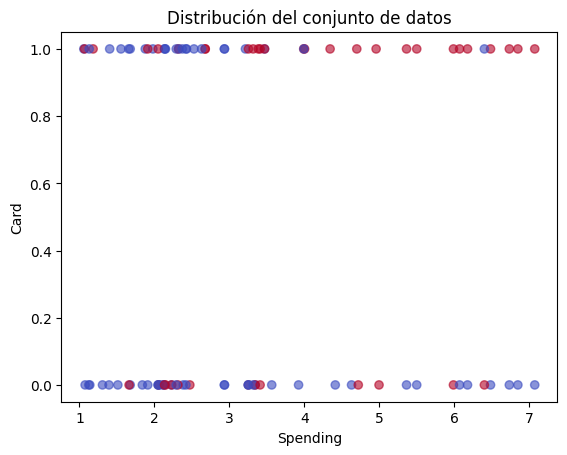

In [29]:
plt.scatter(data["Spending"], data["Card"], c=data["Coupon"], cmap="coolwarm", alpha=0.6)
plt.title("Distribución del conjunto de datos")
plt.xlabel("Spending") #Feature 1
plt.ylabel("Card")
plt.show()

# Dividir los datos en entrenamiento y prueba

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[["Spending", "Card"]],
                                                    data["Coupon"], test_size=0.3, random_state=42)

# Entrenar el modelo

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predicción y evaluación

In [33]:
y_pred = model.predict(X_test)
print("Reporte de clasificación (modelo desbalanceado):")
print(classification_report(y_test, y_pred))

Reporte de clasificación (modelo desbalanceado):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.75      0.67      0.71         9

    accuracy                           0.83        30
   macro avg       0.81      0.79      0.79        30
weighted avg       0.83      0.83      0.83        30



# Entrenamiento con balance de datos

In [34]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con datos balanceados

In [35]:
model.fit(X_resampled, y_resampled)
y_pred_resampled = model.predict(X_test)

# Evaluar el modelo balanceado

In [36]:
print("Reporte de clasificación (modelo balanceado):")
print(classification_report(y_test, y_pred_resampled))

Reporte de clasificación (modelo balanceado):
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.50      0.89      0.64         9

    accuracy                           0.70        30
   macro avg       0.71      0.75      0.69        30
weighted avg       0.80      0.70      0.71        30

